<a href="https://colab.research.google.com/github/virajvaidya/CAPM/blob/main/CAPM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install PyPortfolioOpt

In [ ]:
!pip install statsmodels

In [117]:
import requests
import yfinance             as yf
import pandas               as pd
import numpy                as np
import datetime             as dt
import matplotlib.pyplot    as plt
import seaborn              as sns
import plotly.express       as px
import plotly.graph_objects as go
import statsmodels.api      as sm

from plotly.subplots            import make_subplots
from scipy.stats                import norm
from statsmodels                import regression

**Alcidion (ALC)**

Health tech company using machine learning for optimising patient outcomes.


**Weebit Nano (WBT)**

Semiconductor company using 'Resistive RAM' technology for easier and faster semiconductor manufacturing and yields.

**Volpara (VHT)**

Volpara uses AI to asist in faster and more accurate diagnoses of cancer.

**Link Administration Holdings(LNK)**

Administration of financial ownership data.

**Xero (XRO)**

Accounting and related SaaS offerings.

**Wisetech Global (WTC)**

Logistics software offering.

**Computershare(CPU)**

Fintech platform for share registry services.

**NEXTDC (NXT)**

Data centre company and hosting services.

**Altium (ALU)**

3-D Printing of circuit boards

**Appen(APX)**

Data annotation company using AI and ML.

In [ ]:
asxlist   = ['ALC','WBT','VHT','LNK','XRO','WTC','CPU', 'NXT','ALU','APX']
asxtech   = [i +'.AX' for i in asxlist]
asxtech

In [ ]:
df= yf.download(asxtech)

In [120]:
Close=df.Close

In [121]:
Close.tail()

,ALC.AX,ALU.AX,APX.AX,CPU.AX,LNK.AX,NXT.AX,VHT.AX,WBT.AX,WTC.AX,XRO.AX
Date,,,,,,,,,,
2021-12-06,0.313912,41.419998,9.22,19.389999,4.82,11.59,1.05,2.72,50.660000,140.039993
2021-12-07,0.313912,41.730000,9.53,19.510000,4.89,11.95,1.05,2.92,51.520000,143.429993
2021-12-08,0.313912,42.720001,9.42,19.600000,4.89,12.07,1.06,2.96,53.259998,145.669998
2021-12-09,0.270000,42.080002,9.72,19.740000,4.86,12.15,1.08,2.92,51.580002,140.990005
2021-12-10,0.260000,42.959999,9.78,19.760000,4.87,11.89,1.08,2.90,53.080002,141.100006


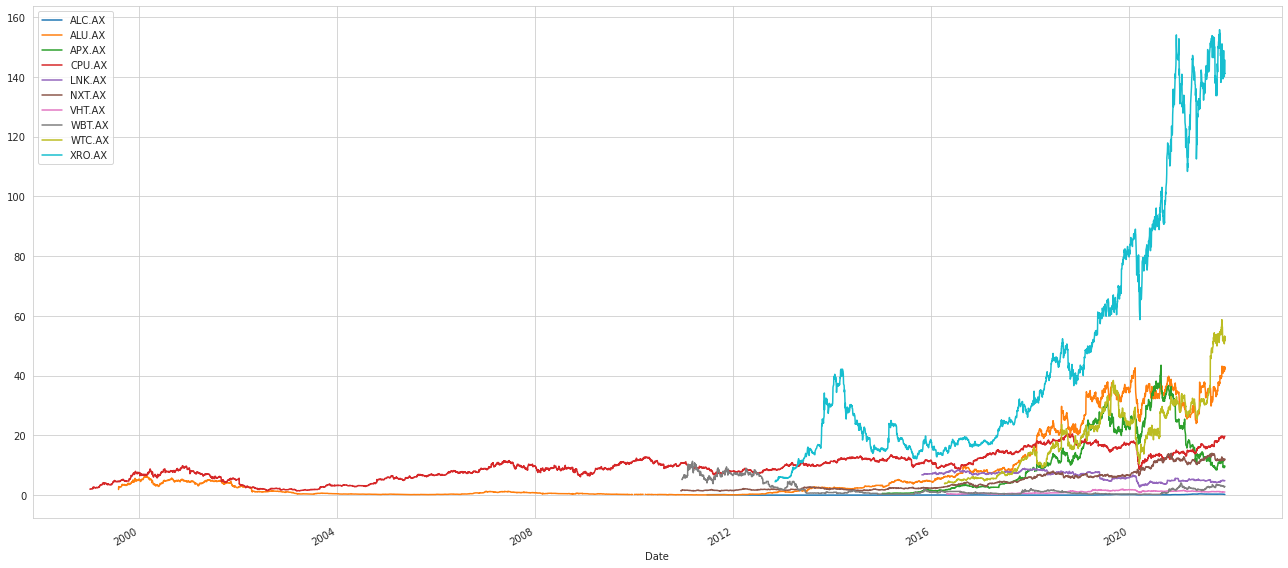

In [122]:
sns.set_style('whitegrid')
pd.plotting.register_matplotlib_converters()
sns.mpl.rc('figure',figsize=(18, 8))
Close.plot()
plt.tight_layout()

In [123]:
Close.describe()

,ALC.AX,ALU.AX,APX.AX,CPU.AX,LNK.AX,NXT.AX,VHT.AX,WBT.AX,WTC.AX,XRO.AX
count,2652.000000,5617.000000,1759.000000,5819.000000,1554.000000,2782.000000,1429.000000,2776.000000,1440.000000,2304.000000
mean,0.098989,7.304271,12.317590,9.519877,6.479347,4.760735,1.049834,2.060439,19.785611,46.835938
std,0.095628,11.323331,10.720975,4.383710,1.494261,3.496217,0.444280,2.347360,12.248345,41.084198
min,0.014000,0.082000,0.525000,1.420000,2.700000,1.335990,0.302939,0.220000,3.840000,4.480000
25%,0.040000,0.410000,2.690000,6.800000,5.010000,1.945475,0.645607,0.573630,8.195000,16.950001
50%,0.054000,2.180000,10.160000,9.250000,7.098920,3.115000,1.132296,0.997618,19.120000,29.150000
75%,0.140664,6.340000,21.945000,12.180000,7.655690,6.597500,1.385000,2.372500,27.974999,63.335001
max,0.480000,43.180000,43.500000,20.709999,8.980000,14.050000,2.090000,11.347912,58.730000,155.750000


In [124]:
returns=Close.pct_change()

In [125]:
returns.tail()

,ALC.AX,ALU.AX,APX.AX,CPU.AX,LNK.AX,NXT.AX,VHT.AX,WBT.AX,WTC.AX,XRO.AX
Date,,,,,,,,,,
2021-12-06,-0.058825,-0.037639,-0.054359,0.014121,-0.012295,-0.015293,-0.032258,-0.071672,-0.014589,-0.017883
2021-12-07,0.000000,0.007484,0.033623,0.006189,0.014523,0.031061,0.000000,0.073529,0.016976,0.024207
2021-12-08,0.000000,0.023724,-0.011542,0.004613,0.000000,0.010042,0.009524,0.013699,0.033773,0.015617
2021-12-09,-0.139886,-0.014981,0.031847,0.007143,-0.006135,0.006628,0.018868,-0.013514,-0.031543,-0.032127
2021-12-10,-0.037037,0.020912,0.006173,0.001013,0.002058,-0.021399,0.000000,-0.006849,0.029081,0.000780


ValueError: ignored

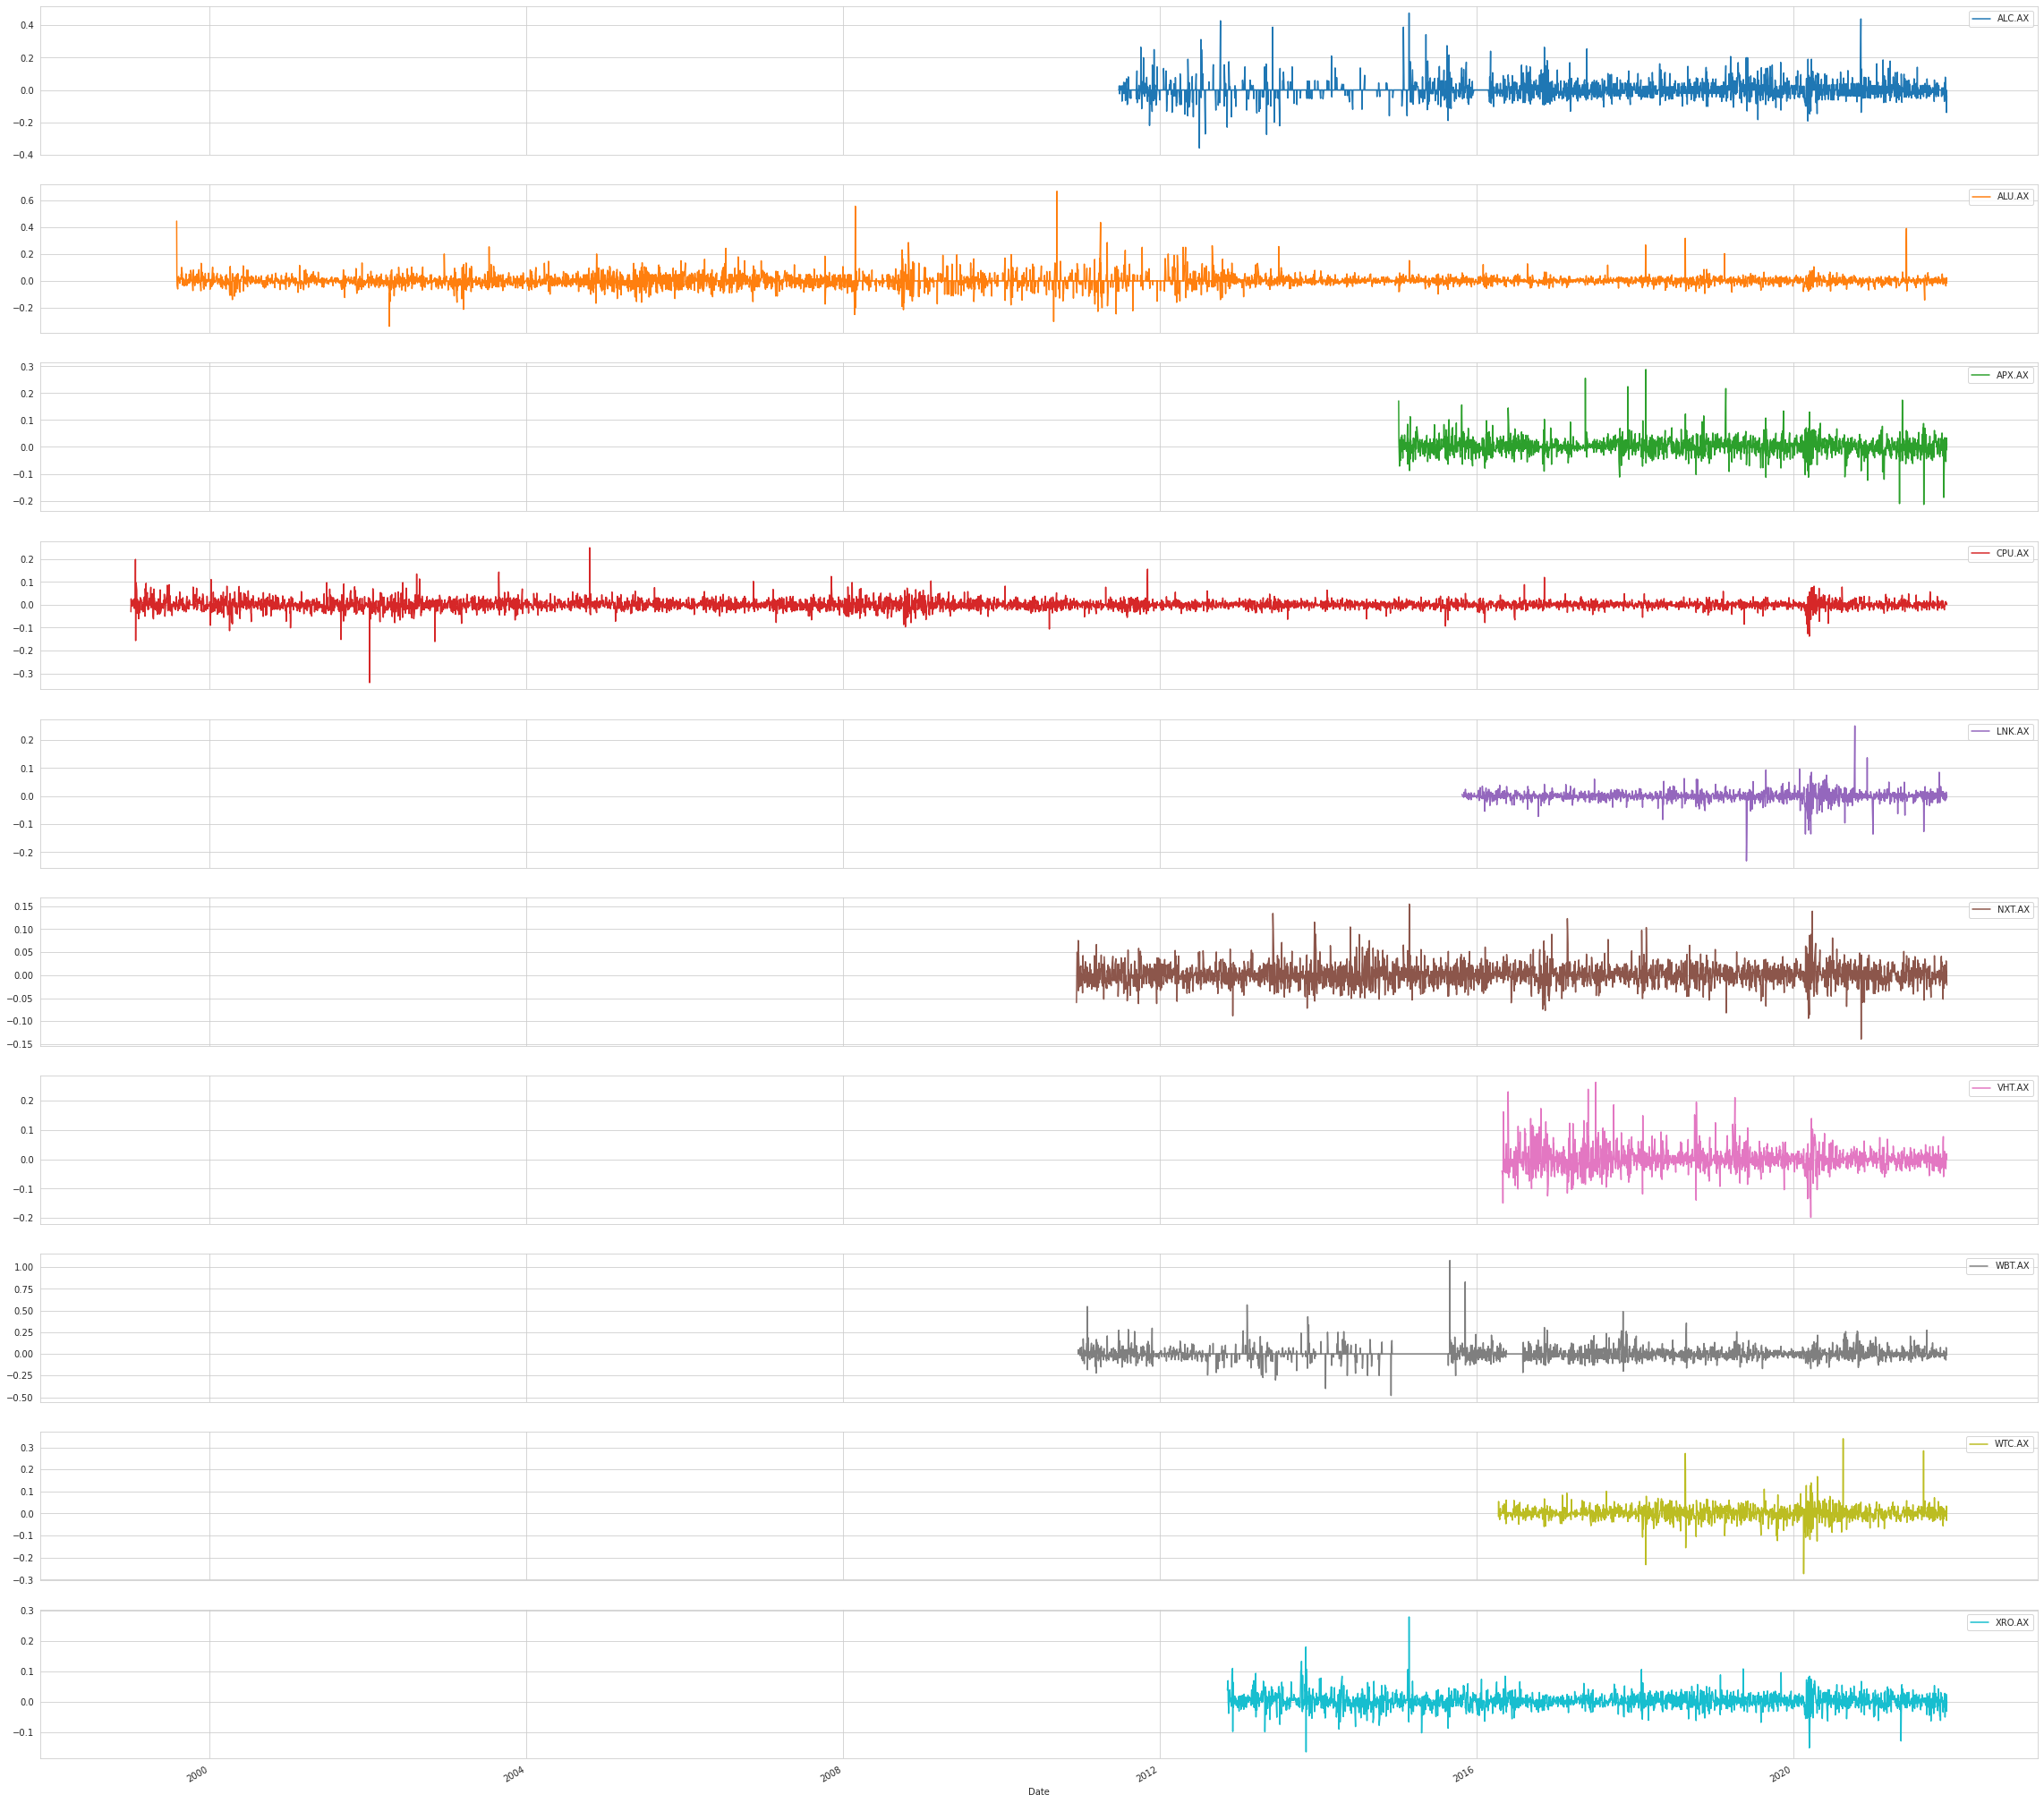

In [126]:
fig1, axs = returns.plot(subplots=True,figsize=(40,40))
fig1.tight_layout()

#Covariance Matrix of the returns of the securities

In [127]:
cov_matrix = returns.cov()
cov_matrix

,ALC.AX,ALU.AX,APX.AX,CPU.AX,LNK.AX,NXT.AX,VHT.AX,WBT.AX,WTC.AX,XRO.AX
ALC.AX,0.002803,0.000072,0.000226,0.000087,0.000161,0.000105,0.000225,0.000167,0.000261,0.000157
ALU.AX,0.000072,0.001808,0.000320,0.000054,0.000130,0.000142,0.000089,0.000020,0.000402,0.000177
APX.AX,0.000226,0.000320,0.001155,0.000139,0.000164,0.000228,0.000171,0.000088,0.000358,0.000239
CPU.AX,0.000087,0.000054,0.000139,0.000466,0.000145,0.000076,0.000115,0.000067,0.000131,0.000100
LNK.AX,0.000161,0.000130,0.000164,0.000145,0.000438,0.000105,0.000126,0.000097,0.000148,0.000123
NXT.AX,0.000105,0.000142,0.000228,0.000076,0.000105,0.000486,0.000069,0.000056,0.000217,0.000147
VHT.AX,0.000225,0.000089,0.000171,0.000115,0.000126,0.000069,0.001524,0.000091,0.000163,0.000152
WBT.AX,0.000167,0.000020,0.000088,0.000067,0.000097,0.000056,0.000091,0.004716,0.000130,0.000051
WTC.AX,0.000261,0.000402,0.000358,0.000131,0.000148,0.000217,0.000163,0.000130,0.001146,0.000244
XRO.AX,0.000157,0.000177,0.000239,0.000100,0.000123,0.000147,0.000152,0.000051,0.000244,0.000629


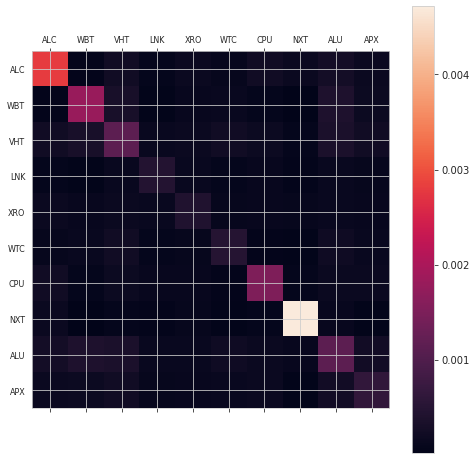

In [128]:
import numpy as np
import matplotlib.pyplot as plt
plt.matshow(cov_matrix)
plt.colorbar()
x = ['ALC','WBT','VHT','LNK','XRO','WTC','CPU', 'NXT','ALU','APX']
y = ['ALC','WBT','VHT','LNK','XRO','WTC','CPU', 'NXT','ALU','APX']
plt.imshow(cov_matrix, interpolation='none')
plt.xticks(range(len(x)), x, fontsize=8)
plt.yticks(range(len(y)), y, fontsize=8)
plt.show()

#Correlation matrix of the returns of the securities

In [129]:
corr_matrix = returns.apply(lambda x: np.log(1+x)).corr()

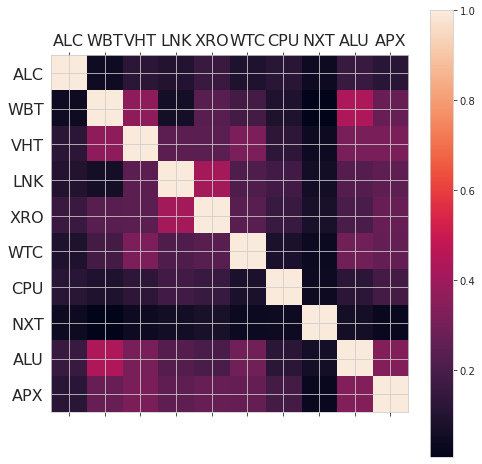

In [17]:
plt.matshow(corr_matrix)
plt.colorbar()
x = ['ALC','WBT','VHT','LNK','XRO','WTC','CPU', 'NXT','ALU','APX']
y = ['ALC','WBT','VHT','LNK','XRO','WTC','CPU', 'NXT','ALU','APX']
plt.imshow(corr_matrix, interpolation='none')
plt.xticks(range(len(x)), x, fontsize=16)
plt.yticks(range(len(y)), y, fontsize=16)
plt.show()

#Computing the average returns on the stocks and sorting them in descending order with the highest average returns first

In [18]:
avgreturns = returns.mean()

In [19]:
sortedreturns= avgreturns.sort_values(ascending=False)
sortedreturns

WTC.AX    0.002385
APX.AX    0.002235
WBT.AX    0.001979
XRO.AX    0.001811
ALC.AX    0.001506
ALU.AX    0.001421
VHT.AX    0.001300
NXT.AX    0.000973
CPU.AX    0.000624
LNK.AX    0.000006
dtype: float64

#Calculating the α and β of the stocks individually



#Alcidion (ASX: ALC)

In [ ]:
axjo=yf.download('^AXJO')                                   #Using the ASX200 (ticker ^AXJO) as our benchmark to measure volatility for our tech portfolio
axjoalc =axjo['Close'].tail(2652)

In [ ]:
alc=yf.download('ALC.AX')
alcreg=alc['Close']

In [132]:
X = axjoalc.values
Y = alcreg.values

In [133]:
print(X.shape) 
print(Y.shape)

(2652,)
(2652,)


In [134]:
alpha = {}
beta = {}

In [135]:
def asx200reg(x,y):
  x= sm.add_constant(x)
  model = regression.linear_model.OLS(y,x).fit()
  x=x[:,1]
  return model.params[0], model.params[1]

alpha, beta = asx200reg(X,Y)

print('ALC alpha:' + str(alpha))
print('ALC beta:'  + str(beta))

ALC alpha:-0.278925747472749
ALC beta:6.715658310082483e-05


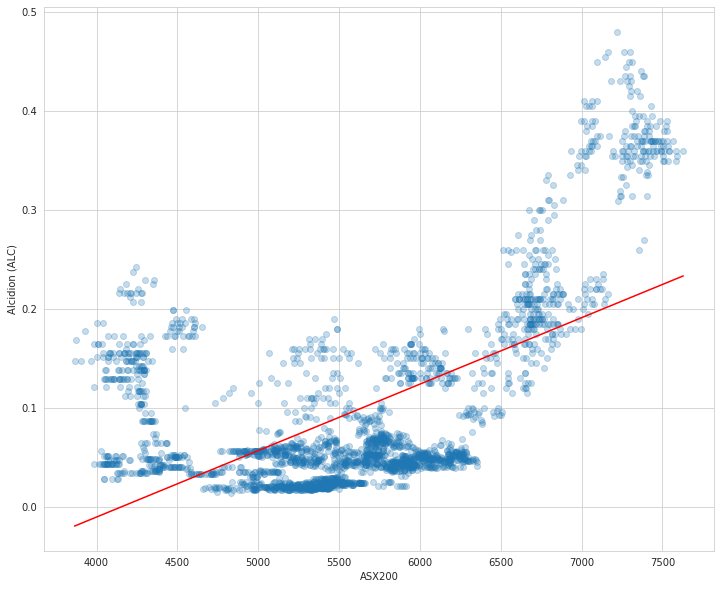

In [136]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(12,10))
plt.scatter(X,Y, alpha = 0.25)
plt.xlabel("ASX200")
plt.ylabel("Alcidion (ALC)")
plt.plot(X2, Y_hat, 'r')
plt.show()

**Insights from the above regression plot:**

1. ALC is a stock that has IPO'd relatively recently and therefore, intuitively, we can assume the volatility will be higher than the ASX200's, which we have chosen as our benchmark. This intuition is proven true when we see that ALC's beta is at 6.7, which is very high.

2. In the graph, we can see a distinct curve on Alcidion Stock values over time. This could be a suggestion that a linear regression is probably not the best way to analyse the volatility of the stock, i.e, the standard beta calculation is probably not the best fit to serve as a guide to derive insights from for our ALC stock.

#Weebit Nano (ASX: WBT)

In [ ]:
wbt=yf.download('WBT.AX')
wbtreg=wbt['Close']

In [138]:
wbtreg.shape

(2776,)

In [139]:
axjowbt =axjo['Close'].tail(2776)

In [140]:
X = axjowbt.values
Y = wbtreg.values

In [141]:
def asx200reg(x,y):
  x= sm.add_constant(x)
  model = regression.linear_model.OLS(y,x).fit()
  x=x[:,1]
  return model.params[0], model.params[1]

alpha, beta = asx200reg(X,Y)

print('WBT alpha:' + str(alpha))
print('WBT beta:'  + str(beta))

WBT alpha:10.220873374765358
WBT beta:-0.0014600853538517082


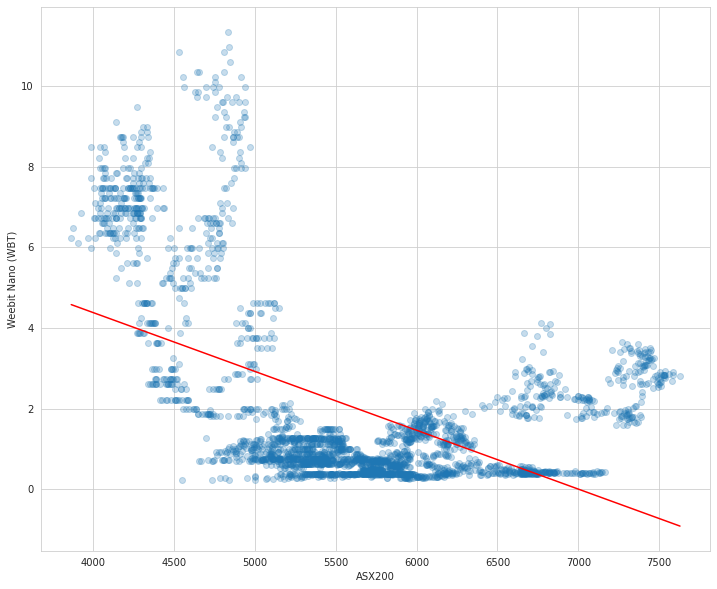

In [142]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(12,10))
plt.scatter(X,Y, alpha = 0.25)
plt.xlabel("ASX200")
plt.ylabel("Weebit Nano (WBT)")
plt.plot(X2, Y_hat, 'r')
plt.show()

#Volpara (ASX:VHT)

In [ ]:
vht=yf.download('VHT.AX')
vhtreg=vht['Close']

In [144]:
vhtreg.shape

(1429,)

In [145]:
axjovht=axjo['Close'].tail(1429)

In [146]:
X = axjovht.values
Y = vhtreg.values

In [147]:
def asx200reg(x,y):
  x= sm.add_constant(x)
  model = regression.linear_model.OLS(y,x).fit()
  x=x[:,1]
  return model.params[0], model.params[1]

alpha, beta = asx200reg(X,Y)

print('VHT alpha:' + str(alpha))
print('VHT beta:'  + str(beta))

VHT alpha:-1.5978883279568714
VHT beta:0.00042814018878363486


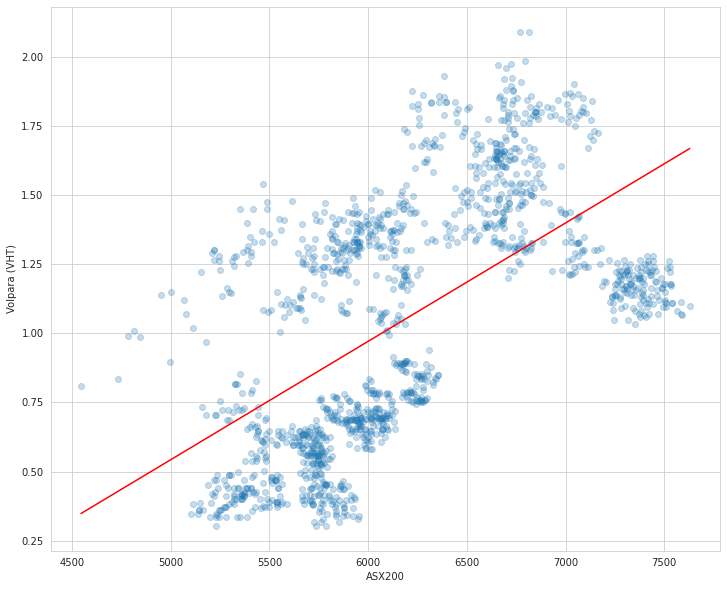

In [148]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(12,10))
plt.scatter(X,Y, alpha = 0.25)
plt.xlabel("ASX200")
plt.ylabel("Volpara (VHT)")
plt.plot(X2, Y_hat, 'r')
plt.show()

#Link Administration Holdings (ASX:LNK)

In [ ]:
lnk=yf.download('LNK.AX')
lnkreg=lnk['Close']

In [150]:
lnkreg.shape

(1554,)

In [151]:
axjolnk =axjo['Close'].tail(1554)

In [152]:
X = axjolnk.values
Y = lnkreg.values

In [153]:
def asx200reg(x,y):
  x= sm.add_constant(x)
  model = regression.linear_model.OLS(y,x).fit()
  x=x[:,1]
  return model.params[0], model.params[1]

alpha, beta = asx200reg(X,Y)

print('LNK alpha:' + str(alpha))
print('LNK beta:'  + str(beta))

LNK alpha:12.910683382945038
LNK beta:-0.001055182275110105


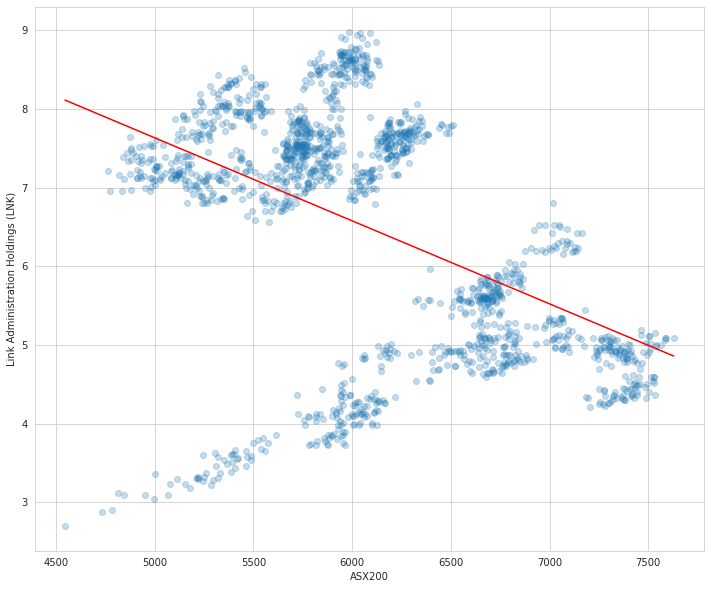

In [154]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(12,10))
plt.scatter(X,Y, alpha = 0.25)
plt.xlabel("ASX200")
plt.ylabel("Link Administration Holdings (LNK)")
plt.plot(X2, Y_hat, 'r')
plt.show()

#Xero (ASX:XRO)

In [ ]:
xro=yf.download('XRO.AX')
xroreg=xro['Close']

In [156]:
xroreg.shape

(2304,)

In [157]:
axjoxro =axjo['Close'].tail(2304)

In [158]:
X = axjoxro.values
Y = xroreg.values

In [159]:
def asx200reg(x,y):
  x= sm.add_constant(x)
  model = regression.linear_model.OLS(y,x).fit()
  x=x[:,1]
  return model.params[0], model.params[1]

alpha, beta = asx200reg(X,Y)

print('XRO alpha:' + str(alpha))
print('XRO beta:'  + str(beta))

XRO alpha:-244.26147272963644
XRO beta:0.04990061726381951


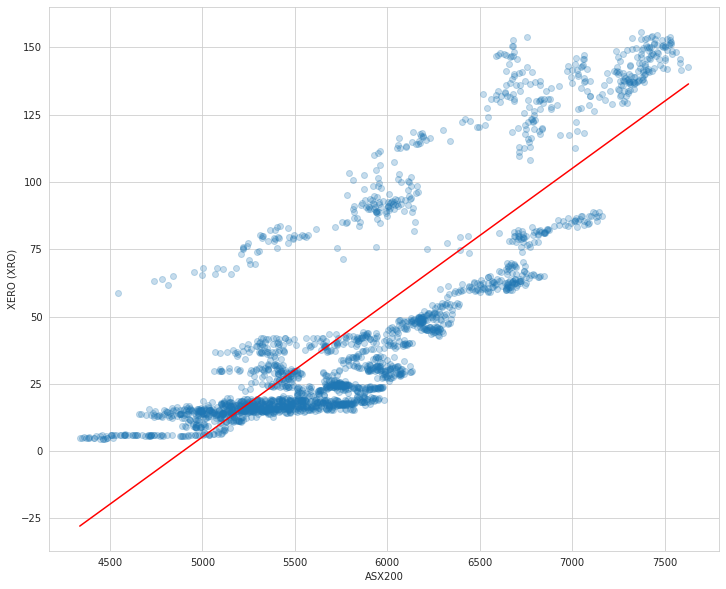

In [160]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(12,10))
plt.scatter(X,Y, alpha = 0.25)
plt.xlabel("ASX200")
plt.ylabel("XERO (XRO)")
plt.plot(X2, Y_hat, 'r')
plt.show()

#WiseTech Global (ASX:WTC)

In [ ]:
wtc=yf.download('WTC.AX')
wtcreg= wtc['Close']

In [47]:
wtcreg.shape

(1440,)

In [162]:
axjowtc =axjo['Close'].tail(1440)

In [163]:
X = axjowtc.values
Y = wtcreg.values

In [164]:
def asx200reg(x,y):
  x= sm.add_constant(x)
  model = regression.linear_model.OLS(y,x).fit()
  x=x[:,1]
  return model.params[0], model.params[1]

alpha, beta = asx200reg(X,Y)

print('WTC alpha:' + str(alpha))
print('WTC beta:'  + str(beta))

WTC alpha:-83.93140018880209
WTC beta:0.016793943499674037


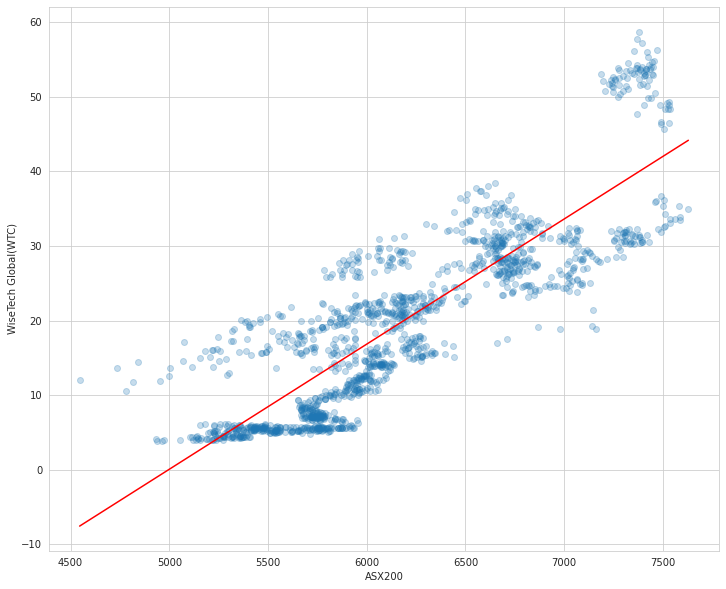

In [165]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(12,10))
plt.scatter(X,Y, alpha = 0.25)
plt.xlabel("ASX200")
plt.ylabel("WiseTech Global(WTC)")
plt.plot(X2, Y_hat, 'r')
plt.show()

#Computershare (ASX:CPU)

In [ ]:
cpu=yf.download('CPU.AX')
cpureg=cpu['Close']

In [167]:
cpureg.shape

(5819,)

In [168]:
axjocpu =axjo['Close'].tail(5819)

In [169]:
X = axjocpu.values
Y = cpureg.values

In [170]:
def asx200reg(x,y):
  x= sm.add_constant(x)
  model = regression.linear_model.OLS(y,x).fit()
  x=x[:,1]
  return model.params[0], model.params[1]

alpha, beta = asx200reg(X,Y)

print('CPU alpha:' + str(alpha))
print('CPU beta:'  + str(beta))

CPU alpha:-5.234232388049052
CPU beta:0.0030879840600993537


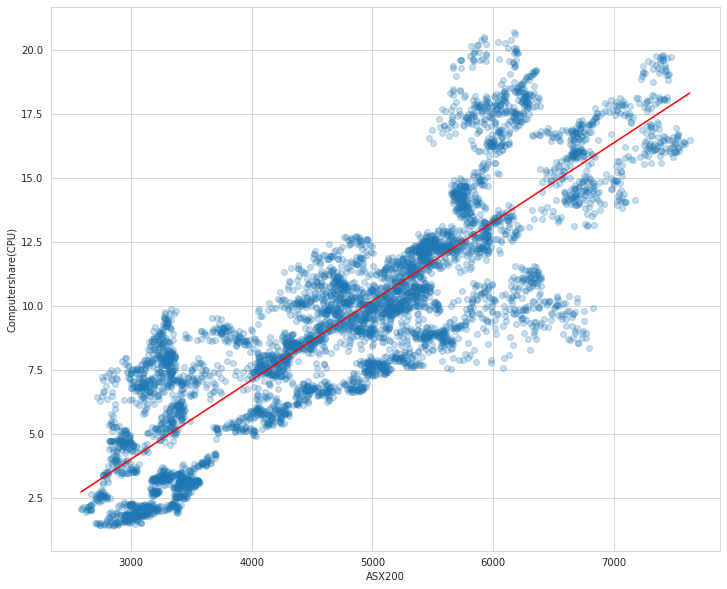

In [171]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(12,10))
plt.scatter(X,Y, alpha = 0.25)
plt.xlabel("ASX200")
plt.ylabel("Computershare(CPU)")
plt.plot(X2, Y_hat, 'r')
plt.show()

#NEXTDC(ASX:NXT)

In [172]:
nxt=yf.download('NXT.AX')
nxtreg=nxt['Close']

[*********************100%***********************]  1 of 1 completed


In [173]:
nxtreg.shape

(2782,)

In [174]:
 axjonxt =axjo['Close'].tail(2782)

In [175]:
X = axjonxt.values
Y = nxtreg.values

In [176]:
def asx200reg(x,y):
  x= sm.add_constant(x)
  model = regression.linear_model.OLS(y,x).fit()
  x=x[:,1]
  return model.params[0], model.params[1]

alpha, beta = asx200reg(X,Y)

print('NXT alpha:' + str(alpha))
print('NXT beta:'  + str(beta))

NXT alpha:-14.038274329858442
NXT beta:0.0033647143585695018


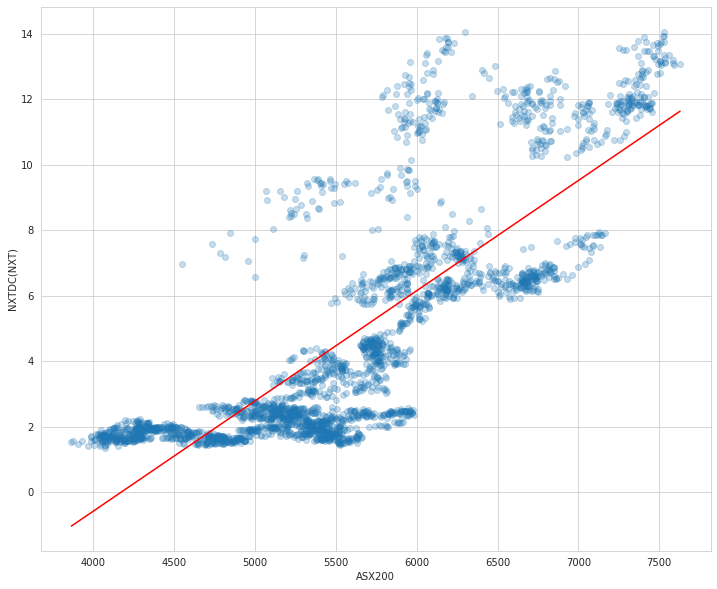

In [177]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(12,10))
plt.scatter(X,Y, alpha = 0.25)
plt.xlabel("ASX200")
plt.ylabel("NXTDC(NXT)")
plt.plot(X2, Y_hat, 'r')
plt.show()

#Altium (ASX:ALU)

In [ ]:
alu=yf.download('ALU.AX')
alureg=alu['Close']

In [ ]:
alureg.shape

In [180]:
axjoalu =axjo['Close'].tail(5617)

In [181]:
X = axjoalu.values
Y = alureg.values

In [182]:
def asx200reg(x,y):
  x= sm.add_constant(x)
  model = regression.linear_model.OLS(y,x).fit()
  x=x[:,1]
  return model.params[0], model.params[1]

alpha, beta = asx200reg(X,Y)

print('ALU alpha:' + str(alpha))
print('ALU beta:'  + str(beta))

ALU alpha:-22.41716332954063
ALU beta:0.006132501744605495


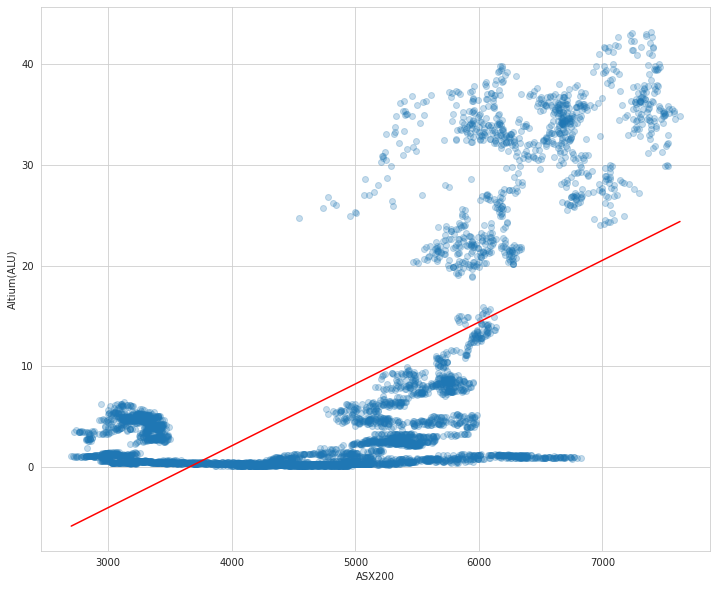

In [183]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(12,10))
plt.scatter(X,Y, alpha = 0.25)
plt.xlabel("ASX200")
plt.ylabel("Altium(ALU)")
plt.plot(X2, Y_hat, 'r')
plt.show()

#Appen (ASX:APX)

In [ ]:
apx=yf.download('APX.AX')
apxreg=apx['Close']

In [185]:
apxreg.shape

(1759,)

In [186]:
axjoapx =axjo['Close'].tail(1759)

In [187]:
X = axjoapx.values
Y = apxreg.values

In [188]:
def asx200reg(x,y):
  x= sm.add_constant(x)
  model = regression.linear_model.OLS(y,x).fit()
  x=x[:,1]
  return model.params[0], model.params[1]

alpha, beta = asx200reg(X,Y)

print('APX alpha:' + str(alpha))
print('APX beta:'  + str(beta))

APX alpha:-35.53043931662988
APX beta:0.00793093784242488


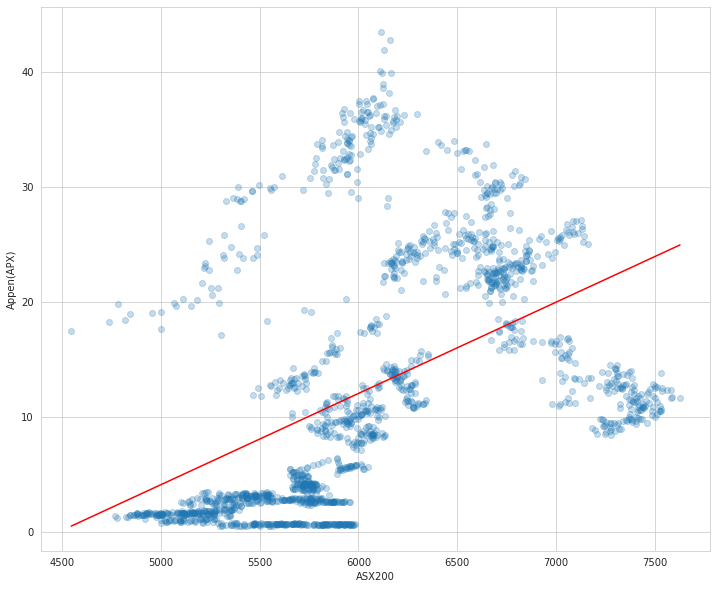

In [189]:
X2 = np.linspace(X.min(), X.max(), 100)
Y_hat = X2 * beta + alpha

plt.figure(figsize=(12,10))
plt.scatter(X,Y, alpha = 0.25)
plt.xlabel("ASX200")
plt.ylabel("Appen(APX)")
plt.plot(X2, Y_hat, 'r')
plt.show()